In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Merge and Cleaning

In [2]:
# Load all datasets
customer = pd.read_csv('Dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('Dataset/olist_geolocation_dataset.csv')
order_items = pd.read_csv('Dataset/olist_order_items_dataset.csv')
order_payments = pd.read_csv('Dataset/olist_order_payments_dataset.csv')
orders = pd.read_csv('Dataset/olist_orders_dataset.csv')
products = pd.read_csv('Dataset/olist_products_dataset.csv')
sellers = pd.read_csv('Dataset/olist_sellers_dataset.csv')
category_name_translation = pd.read_csv('Dataset/product_category_name_translation.csv')
reviews = pd.read_csv('Dataset/olist_order_reviews_dataset.csv')

In [44]:
df= pd.merge(customer, orders, on="customer_id", how='inner')
df= df.merge(reviews, on="order_id", how='inner')
df= df.merge(order_items, on="order_id", how='inner')
df= df.merge(products, on="product_id", how='inner')
df= df.merge(order_payments, on="order_id", how='inner')
df= df.merge(sellers, on='seller_id', how='inner')
df= df.merge(category_name_translation, on='product_category_name', how='inner')
print(df.shape)
print(df.columns)
df.head()

(115609, 40)
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,1,credit_card,2,146.87,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,64.0,31.0,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,64.0,31.0,1,credit_card,1,275.79,8577,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,64.0,31.0,1,credit_card,7,140.61,8577,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,64.0,31.0,1,credit_card,10,137.58,8577,itaquaquecetuba,SP,office_furniture


In [24]:
df.duplicated().sum()

0

In [25]:
def resumetable(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing Percentage'] = summary['Missing']/df.shape[0]     
    summary['Uniques'] = df.nunique().values
    return summary

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], 
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [26]:
resumetable(df)

,Name,dtypes,Missing,Missing Percentage,Uniques
0,customer_id,object,0,0.000000,96516
1,customer_unique_id,object,0,0.000000,93396
2,customer_zip_code_prefix,int64,0,0.000000,14907
3,customer_city,object,0,0.000000,4093
4,customer_state,object,0,0.000000,27
5,order_id,object,0,0.000000,96516
6,order_status,object,0,0.000000,7
7,order_purchase_timestamp,object,0,0.000000,95989
8,order_approved_at,object,14,0.000121,88332
9,order_delivered_carrier_date,object,1195,0.010337,79241


# Feature Engineering

## Categories

In [28]:
def classify_cat(x):

    categories = {
        'Furniture': ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery'],
        'Electronics': ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services'],
        'Fashion': ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ],
        'Home & Garden': ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place'],
        'Entertainment': ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art'],
        'Beauty & Health': ['health_beauty', 'perfumery', 'diapers_and_hygiene'],
        'Food & Drinks': ['food_drink', 'drinks', 'food'],
        'Books & Stationery': ['books_general_interest', 'books_technical', 'books_imported', 'stationery'],   
        'Industry & Construction': ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']
    }

    for category, products in categories.items():
        if x in products:
            return category

    return 'Others'

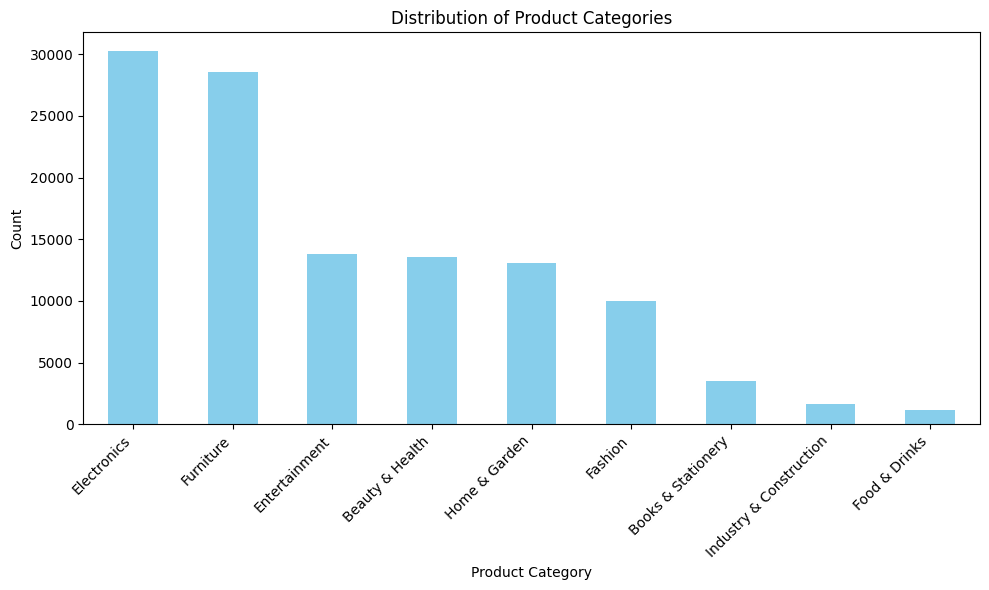

In [45]:
df['product_category'] = df.product_category_name_english.apply(classify_cat)
product_category_counts = df['product_category'].value_counts()
plt.figure(figsize=(10, 6))
product_category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Last Order Date

In [46]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Calculate the latest order date
latest_order_date = df['order_purchase_timestamp'].max()
print("Latest order date: {}".format(latest_order_date))

Latest order date: 2018-09-03 09:06:57


In [47]:
latest_purchase_df = df.groupby('customer_id')['order_purchase_timestamp'].max()
latest_purchase_df = latest_purchase_df.reset_index().rename(columns={'order_purchase_timestamp': 'latest_purchase_date'})
latest_purchase_df['days_since_last_purchase'] = (latest_order_date - latest_purchase_df['latest_purchase_date']).dt.days

bins = [-1, 29, 89, 179, 359, float('inf')]  
labels = ['0-30 days', '1-3 month', '3-6 months', '6 months-1 year', 'More than 1 year']
latest_purchase_df['purchase_interval'] = pd.cut(latest_purchase_df['days_since_last_purchase'], bins=bins, labels=labels)
latest_purchase_df.head(5)

,customer_id,latest_purchase_date,days_since_last_purchase,purchase_interval
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,292,6 months-1 year
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,413,More than 1 year
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,551,More than 1 year
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,382,More than 1 year
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,153,3-6 months


In [48]:
df = pd.merge(df, latest_purchase_df, on="customer_id", how='left')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,latest_purchase_date,days_since_last_purchase,purchase_interval
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2,146.87,8577,itaquaquecetuba,SP,office_furniture,Furniture,2017-05-16 15:05:35,474,More than 1 year
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,275.79,8577,itaquaquecetuba,SP,office_furniture,Furniture,2017-11-09 00:50:13,298,6 months-1 year
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1,275.79,8577,itaquaquecetuba,SP,office_furniture,Furniture,2017-11-09 00:50:13,298,6 months-1 year
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,7,140.61,8577,itaquaquecetuba,SP,office_furniture,Furniture,2017-05-07 20:11:26,483,More than 1 year
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,10,137.58,8577,itaquaquecetuba,SP,office_furniture,Furniture,2018-02-03 19:45:40,211,6 months-1 year


In [52]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english', 'product_category',
       'latest_purchase_date', 'd

# Customer Demographics & Behavioral

In [49]:
print(len(df['customer_city'].unique()))
print(len(df['customer_state'].unique()))

4093
27


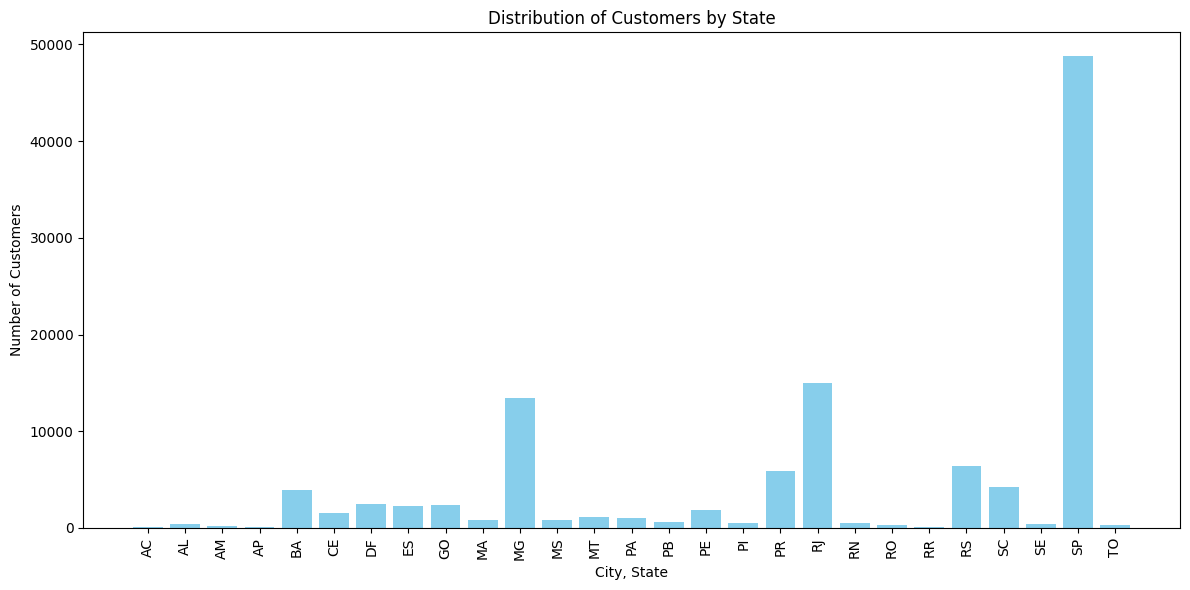

In [50]:
state_counts = df.groupby(['customer_state']).size().reset_index(name='count')
state_counts = state_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(state_counts.index, state_counts['count'], color='skyblue')
plt.xlabel('City, State')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by State')
plt.xticks(state_counts.index, state_counts['customer_state'], rotation=90)
plt.tight_layout()
plt.show()

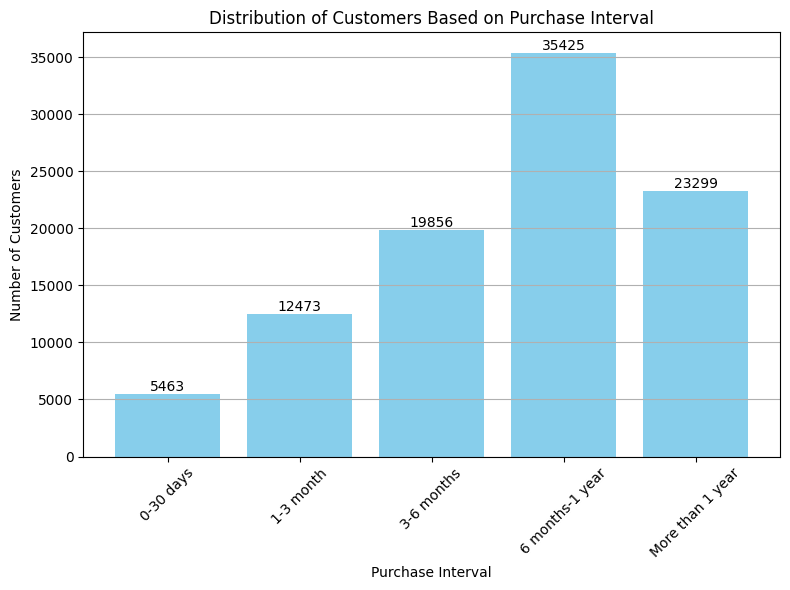

In [51]:
grouped_customers = latest_purchase_df.groupby('purchase_interval').size().reset_index(name='customer_count')

plt.figure(figsize=(8, 6))
bars = plt.bar(grouped_customers['purchase_interval'], grouped_customers['customer_count'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.title('Distribution of Customers Based on Purchase Interval')
plt.xlabel('Purchase Interval')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.tight_layout() 
plt.show()

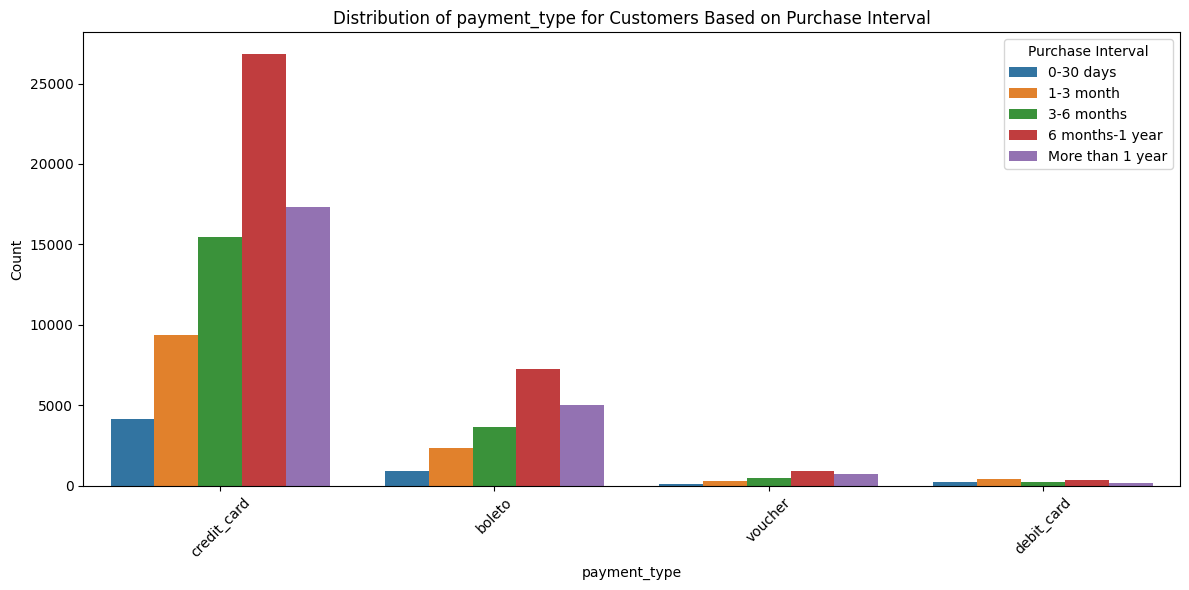

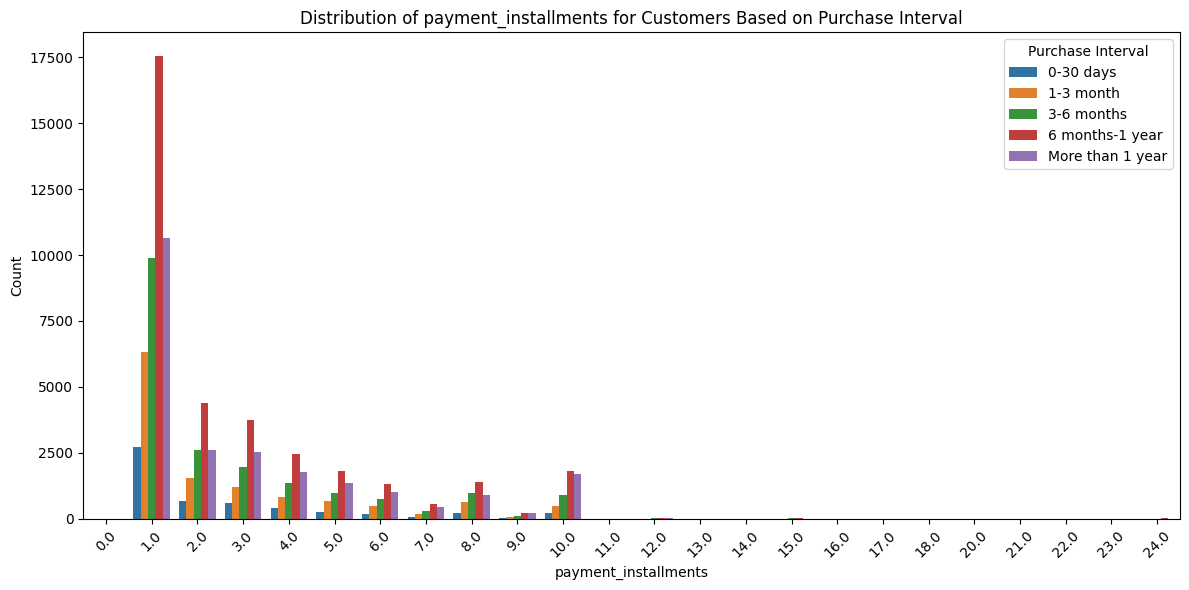

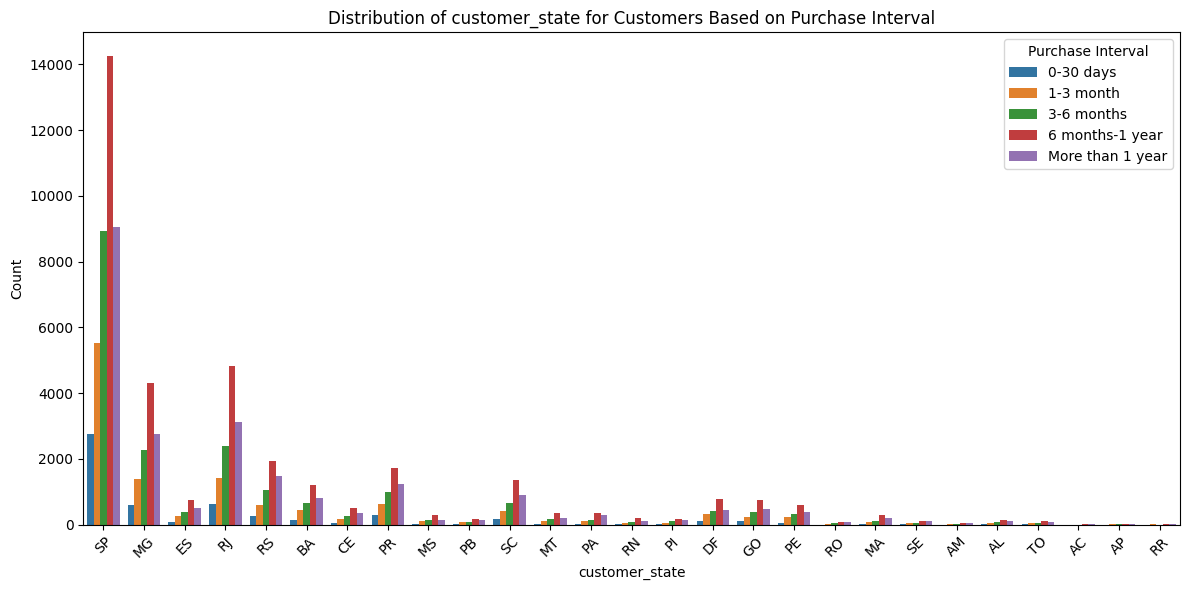

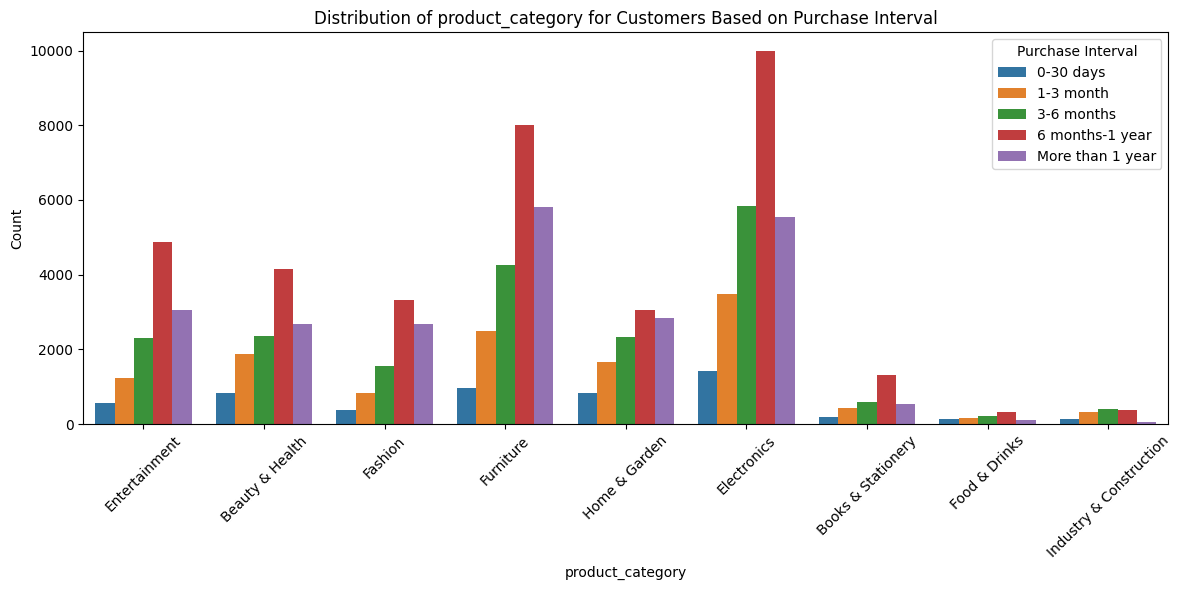

In [58]:
features = ['payment_type', 'payment_installments', 'customer_state', 'product_category']
for feature in features:
    grouped_data = df.groupby(['customer_id', 'purchase_interval'])[feature].first().reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.countplot(data=grouped_data, x=feature, hue='purchase_interval')
    plt.title(f'Distribution of {feature} for Customers Based on Purchase Interval')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Purchase Interval', loc='upper right')
    plt.tight_layout()
    plt.show()

In [59]:
df.groupby('purchase_interval')['payment_value'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
purchase_interval,,,,,,,,
0-30 days,6320.0,165.54,226.70,0.31,60.96,105.40,179.23,3351.35
1-3 month,14758.0,177.08,271.11,0.01,62.58,112.90,193.98,7274.88
3-6 months,23752.0,180.42,252.59,0.01,63.15,112.82,196.88,4445.50
6 months-1 year,42524.0,171.93,294.41,0.00,61.28,107.78,188.94,13664.08
More than 1 year,28255.0,165.40,234.85,0.00,57.64,103.62,184.82,6929.31


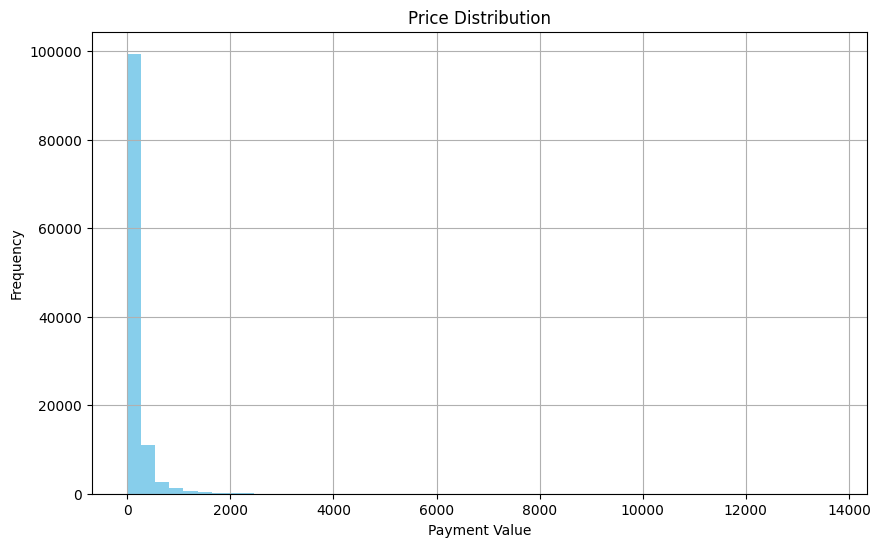

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df['payment_value'], bins=50, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# K-means Clustering

In [94]:
attributes = ['customer_id', 'customer_state', 'freight_value', 
              'payment_type', 'payment_installments', 'payment_value', 'days_since_last_purchase']
data = df[attributes]
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               115609 non-null  object 
 1   customer_state            115609 non-null  object 
 2   freight_value             115609 non-null  float64
 3   payment_type              115609 non-null  object 
 4   payment_installments      115609 non-null  int64  
 5   payment_value             115609 non-null  float64
 6   days_since_last_purchase  115609 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 7.1+ MB
None


,customer_id,customer_state,freight_value,payment_type,payment_installments,payment_value,days_since_last_purchase
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,21.88,credit_card,2,146.87,474
1,8912fc0c3bbf1e2fbf35819e21706718,PA,24.90,credit_card,1,275.79,298
2,8912fc0c3bbf1e2fbf35819e21706718,PA,24.90,credit_card,1,275.79,298
3,f0ac8e5a239118859b1734e1087cbb1f,RS,15.62,credit_card,7,140.61,483
4,6bc8d08963a135220ed6c6d098831f84,RJ,30.59,credit_card,10,137.58,211


In [98]:
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['customer_state', 'payment_type']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

processed_data = preprocessor.fit_transform(data)

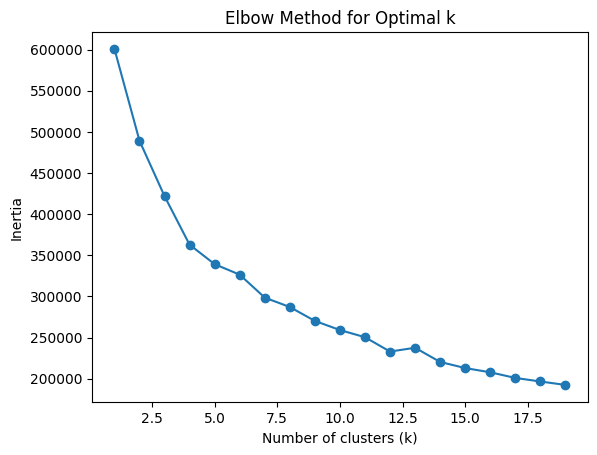

In [101]:
k_values = range(1, 20)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

No clear elbow. Choose k=5 since we might not be able to handle a too large k (meaningless to have so many segments)

In [102]:
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters as per your requirement
clusters = kmeans.fit_predict(processed_data)
data['cluster'] = clusters

C:\Users\user1\AppData\Local\Temp\ipykernel_18580\1660283092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusters


<Figure size 1600x1200 with 0 Axes>

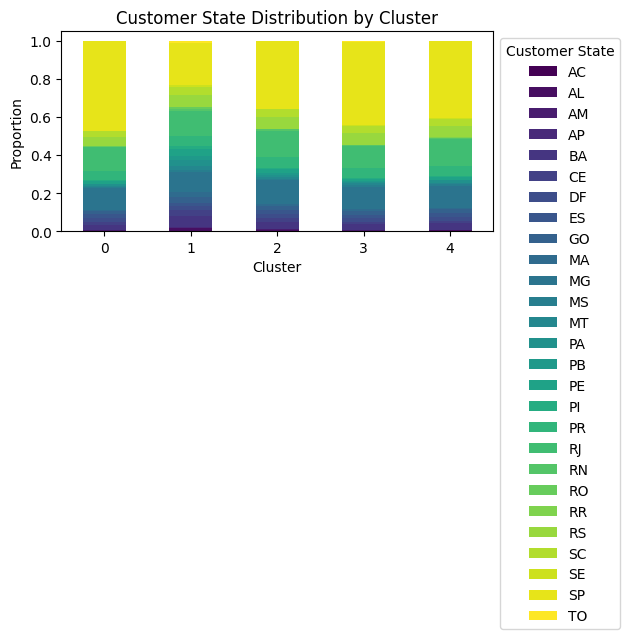

In [104]:
cluster_state_counts = data.groupby(['cluster', 'customer_state']).size().unstack(fill_value=0)
cluster_state_props = cluster_state_counts.div(cluster_state_counts.sum(axis=1), axis=0)

plt.figure(figsize=(16, 12))
cluster_state_props.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Customer State Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Customer State', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<Figure size 1600x1200 with 0 Axes>

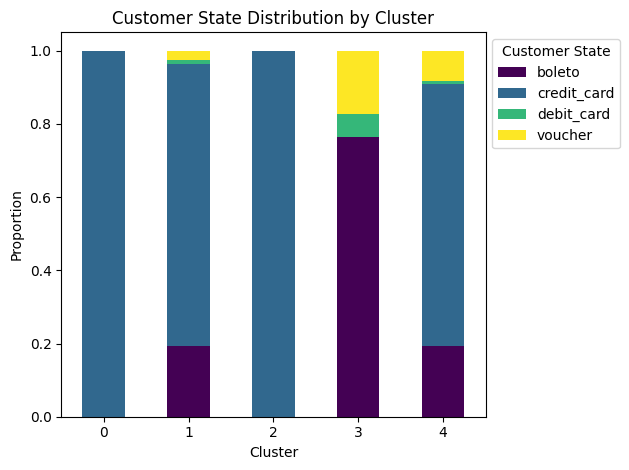

In [105]:
cluster_state_counts = data.groupby(['cluster', 'payment_type']).size().unstack(fill_value=0)
cluster_state_props = cluster_state_counts.div(cluster_state_counts.sum(axis=1), axis=0)

plt.figure(figsize=(16, 12))
cluster_state_props.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Customer State Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Customer State', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

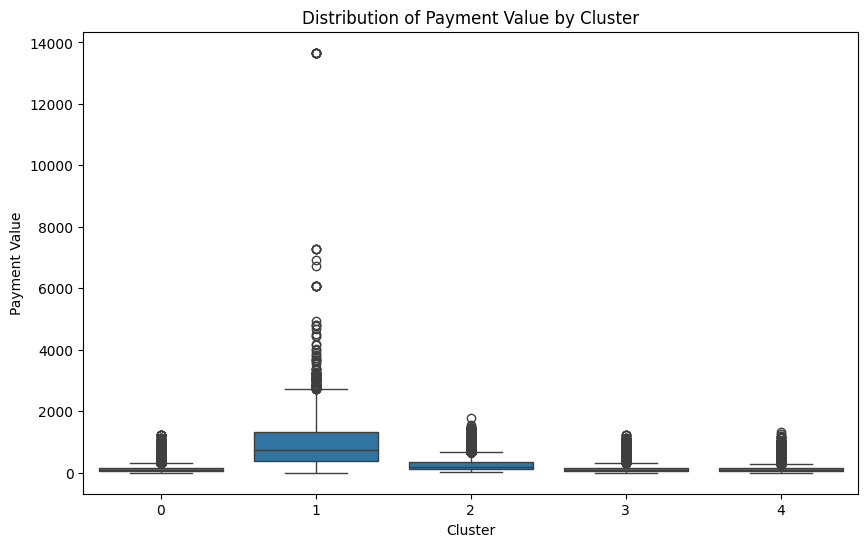

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='cluster', y='payment_value')
plt.title('Distribution of Payment Value by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Payment Value')
plt.show()

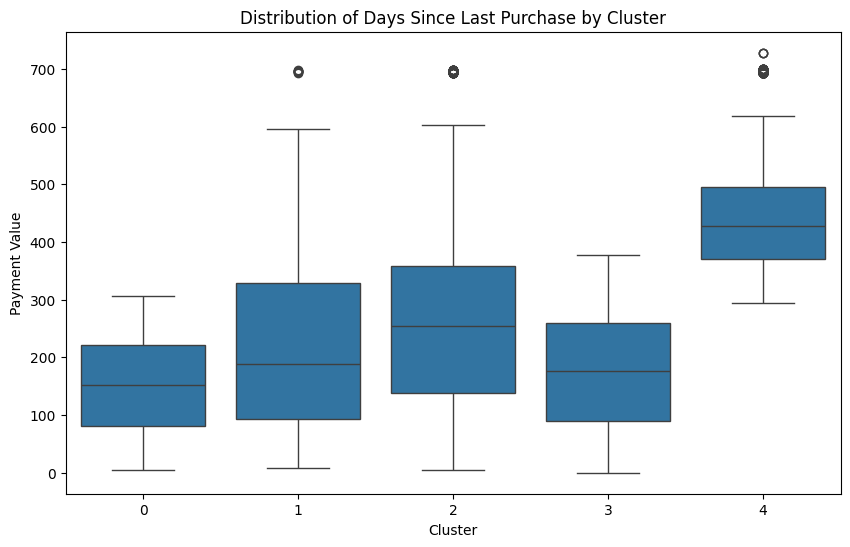

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='cluster', y='days_since_last_purchase')
plt.title('Distribution of Days Since Last Purchase by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Payment Value')
plt.show()

In [109]:
new_df = pd.merge(df, data[['cluster', 'customer_id']], on = 'customer_id', how = 'left')

In [113]:
new_df.to_csv('segmented.csv')

# RFM Analysis for segmented customers

In [123]:
grouped = new_df.groupby('cluster')

def calculate_rfm_metrics(group):
    n = group['customer_id'].nunique()
    r = group['days_since_last_purchase'].mean()
    f = group['customer_id'].count() / group['customer_id'].nunique()
    m = group['payment_value'].sum()
    return pd.Series({'Total Number of Customer': n, 'Recency': r, 'Frequency': f, 'Monetary': m})

rfm_results = grouped.apply(calculate_rfm_metrics)
print(rfm_results.round(2))

         Total Number of Customer  Recency  Frequency    Monetary
cluster                                                          
0                         39632.0   152.30       1.52  8570384.40
1                          2891.0   217.29       2.70  9995198.57
2                         13969.0   254.98       2.11  9473629.55
3                         17389.0   176.72       2.36  6027621.08
4                         24231.0   435.33       2.23  6257170.60
